In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt, ticker as mticker
from matplotlib.lines import Line2D
import pandas as pd
import seaborn as sns

In [27]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
gyorColors = np.array(['limegreen', 'yellow', 'darkorange', 'red'])
backgroundColor = '#444444'
plt.rcParams['axes.facecolor'] = backgroundColor
distColor = 'tab:orange'
gainColor = 'tab:pink'
daysColor = 'tab:cyan'
hikesColor = 'tab:red'
legendColor = 'w'
titleSize = 36
axisLabelSize = 27
tickLabelSize = 18
legendTextSize = 18
standardCanvasHeight = 10
standardCanvasWidth = 20

In [28]:
myTrails = pd.read_csv('MyTrails.csv')
completedHikes = myTrails[pd.isna(myTrails.rating) == False]
completedHikes.head(3)

,#,name,len,gain,days,others,year,month,shelter,route_type,...,forest,lake,river,waterfall,beach,historic_site,cave,injury,difficulty,rating
0,1,South Kaibab + Bright Angel Trail,26.4,1450,2.0,1.0,2009.0,Jul,NaN,point to point,...,0,0,1,0,0,1,0,0.0,7.0,5.0
1,2,Highland Trail Failure,10.0,130,2.0,19.0,2012.0,Jun,tent,out and back,...,1,1,1,1,1,0,0,1.0,1.0,1.0
2,3,Kepler Track,55.1,1700,3.0,0.0,2019.0,Nov,tent,point to point,...,1,1,1,1,1,0,1,0.0,7.0,5.0


In [29]:
### Quick Stats

def printMostMsg(mostHike, most, col, units, r):
    if mostHike.shape[0] == 1:
        print("Hike with Most " + most + ": " + mostHike.iloc[0]["name"] + " ("
              + str(round(mostHike.iloc[0][col], r)) + " " + units + ")")
    else:
        mostDaysMsg = "Hike with Most " + most + ": (" + str(round(mostHike.iloc[0][col], r)) + " " + units + ")\n"
        for i in range(mostHike.shape[0]):
            mostDaysMsg += "    " + mostHike.iloc[i]["name"]
            if i != mostHike.shape[0] - 1:
                mostDaysMsg += ",\n"
        print(mostDaysMsg)

totalDist = completedHikes.len.sum()
print("Total Distance: " + str(totalDist) + " km (" 
      + str(round(totalDist/40075, 3)) + " Earths, " 
      + str(round(totalDist/24.8, 1)) + " Liechtensteins, " 
      + str(round(totalDist/0.0299)) + " blue whales)")
totalGain = completedHikes.gain.sum()
print("Total Elevation Gain: " + str(totalGain) + " m (" 
      + str(round(totalGain/(8849-2840), 2)) + " Everests, " 
      + str(round(totalGain/830, 1)) + " Burj Khalifas, " 
      + str(round(totalGain/1.6256)) + " Nazbans)")
print("Total Days: " + str(round(completedHikes.days.sum())))
print("Number of Hikes: " + str(completedHikes.shape[0]))
print("\n")

mostDistHike = completedHikes[completedHikes.len == completedHikes.len.max()]
mostGainHike = completedHikes[completedHikes.gain == completedHikes.gain.max()]
mostDaysHike = completedHikes[completedHikes.days == completedHikes.days.max()]

distPerDay = completedHikes.len/completedHikes.days
mostDistPerDayHike = completedHikes[completedHikes.len/completedHikes.days == distPerDay.max()]
gainPerDay = completedHikes.gain/completedHikes.days
mostGainPerDayHike = completedHikes[completedHikes.gain/completedHikes.days == gainPerDay.max()]

printMostMsg(mostDistHike, "Distance", "len", "km", 1)
printMostMsg(mostGainHike, "Elevation Gain", "gain", "m", 0)
printMostMsg(mostDaysHike, "Days", "days", "days", 0)
print("Hike with Most Distance per Day: " + mostDistPerDayHike.iloc[0]["name"] 
      + " (" + str(round(distPerDay.max(),1)) + " km/Day)")
print("Hike with Most Elevation Gain per Day: " + mostGainPerDayHike.iloc[0]["name"] 
      + " (" + str(round(gainPerDay.max())) + " m/Day)")
print("\n")

print("Average Distance per Hike: " + str(round(completedHikes.len.mean(), 1)) + " km")
print("Average Elevation Gain per Hike: " + str(round(completedHikes.gain.mean())) + " m")
print("Average Days per Hike: " + str(round(completedHikes.days.mean(), 1)) + " days")
print("Average Distance per Day: " + str(round(completedHikes.len.sum()/completedHikes.days.sum(), 1)) + " km")
print("Average Elevation Gain per Day: " + str(round(completedHikes.gain.sum()/completedHikes.days.sum())) + " m")
print("\n")

print("Average Rating: " + str(round(completedHikes.rating.mean(), 1)) + " (1-5 scale, middle is 3)")
print("Average Difficulty: " + str(round(completedHikes.difficulty.mean(), 1)) + " (1-7 scale, middle is 4)")
print("Average Number of People: " + str(round(completedHikes.others.mean() + 1, 1)))
print("Most Common Route Type: " + completedHikes.route_type.mode().iloc[0])
print("Most Common Shelter: " + completedHikes.shelter.mode().iloc[0])
print("Injury/Illness Rate: " + str(round(completedHikes.injury.mean(), 2)))
print("Solo Rate: " + str(round(completedHikes[completedHikes.others == 0].shape[0]/completedHikes.shape[0], 2)))
print("\n")

print("Forest Rate: " + str(round(completedHikes.forest.mean(), 2)))
print("Lake Rate: " + str(round(completedHikes.lake.mean(), 2)))
print("River Rate: " + str(round(completedHikes.river.mean(), 2)))
print("Waterfall Rate: " + str(round(completedHikes.waterfall.mean(), 2)))
print("Beach Rate: " + str(round(completedHikes.beach.mean(), 2)))
print("Historic Site Rate: " + str(round(completedHikes.historic_site.mean(), 2)))
print("Cave Rate: " + str(round(completedHikes.cave.mean(), 2)))

Total Distance: 288.6 km (0.007 Earths, 11.6 Liechtensteins, 9652 blue whales)
Total Elevation Gain: 5250 m (0.87 Everests, 6.3 Burj Khalifas, 3230 Nazbans)
Total Days: 29
Number of Hikes: 11


Hike with Most Distance: Kepler Track (55.1 km)
Hike with Most Elevation Gain: Kepler Track (1700 m)
Hike with Most Days: (3.0 days)
    Kepler Track,
    Bruce Trail (Upper Peninsula),
    Western Uplands Trail (L1),
    Provoking Lake Loop,
    Big Salmon Lake Loop,
    Abes and Essens Lake Trail (L3),
    Eastern Pines Trail (L1)
Hike with Most Distance per Day: Kepler Track (18.4 km/Day)
Hike with Most Elevation Gain per Day: South Kaibab + Bright Angel Trail (725 m/Day)


Average Distance per Hike: 26.2 km
Average Elevation Gain per Hike: 477 m
Average Days per Hike: 2.6 days
Average Distance per Day: 10.0 km
Average Elevation Gain per Day: 181 m


Average Rating: 3.2 (1-5 scale, middle is 3)
Average Difficulty: 3.9 (1-7 scale, middle is 4)
Average Number of People: 3.5
Most Common Route Ty

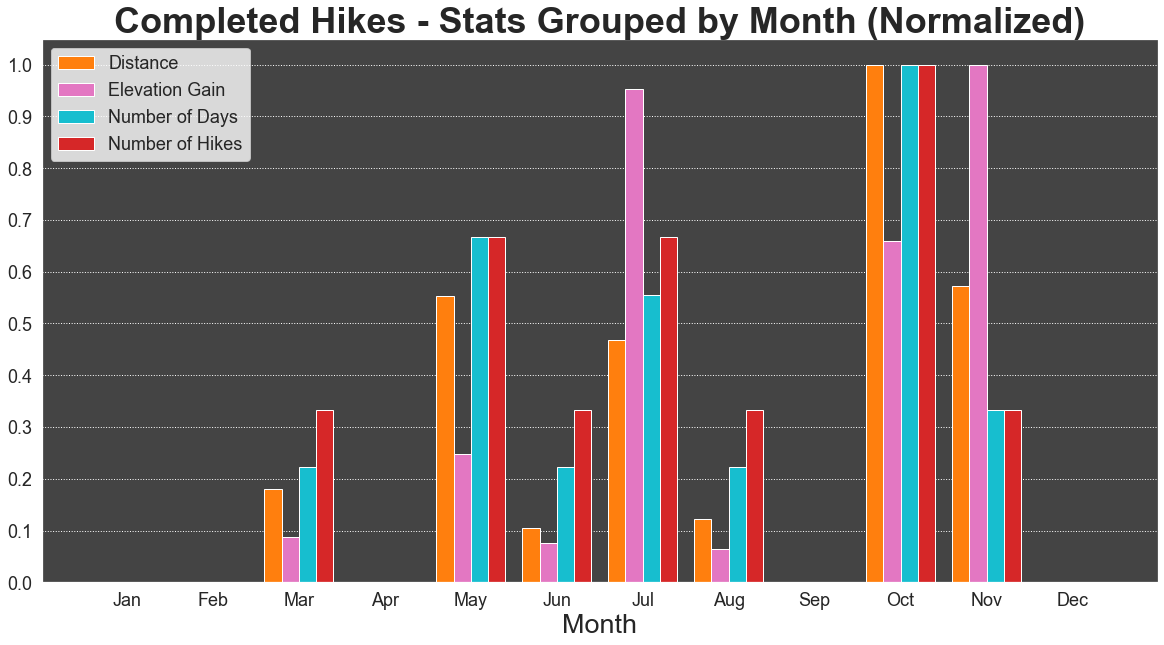

<Figure size 1440x288 with 0 Axes>

In [30]:
### Stats Grouped by Month

monthDists = np.zeros(12)
monthGains = np.zeros(12)
monthDays = np.zeros(12)
monthHikes = np.zeros(12)

def addToMonth(i, hike):
    monthDists[i] += hike.len
    monthGains[i] += hike.gain
    monthDays[i] += hike.days
    monthHikes[i] += 1

for i, hike in completedHikes.iterrows():
    currentMonth = str(hike.month)
    if currentMonth == months[0]:
        addToMonth(0, hike)
    elif currentMonth == months[1]:
        addToMonth(1, hike)
    elif currentMonth == months[2]:
        addToMonth(2, hike)
    elif currentMonth == months[3]:
        addToMonth(3, hike)
    elif currentMonth == months[4]:
        addToMonth(4, hike)
    elif currentMonth == months[5]:
        addToMonth(5, hike)
    elif currentMonth == months[6]:
        addToMonth(6, hike)
    elif currentMonth == months[7]:
        addToMonth(7, hike)
    elif currentMonth == months[8]:
        addToMonth(8, hike)
    elif currentMonth == months[9]:
        addToMonth(9, hike)
    elif currentMonth == months[10]:
        addToMonth(10, hike)
    elif currentMonth == months[11]:
        addToMonth(11, hike)
        
# Normalizing
monthDists = monthDists/np.max(monthDists)
monthGains = monthGains/np.max(monthGains)
monthDays = monthDays/np.max(monthDays)
monthHikes = monthHikes/np.max(monthHikes)

# Plotting
xAxis = np.arange(len(months))

plt.bar(xAxis-0.3, monthDists, 0.2, label="Distance", color=distColor)
plt.bar(xAxis-0.1, monthGains, 0.2, label="Elevation Gain", color=gainColor)
plt.bar(xAxis+0.1, monthDays, 0.2, label="Number of Days", color=daysColor)
plt.bar(xAxis+0.3, monthHikes, 0.2, label="Number of Hikes", color=hikesColor)

ax = plt.gca()
fig = plt.gcf()
fig.set_size_inches(standardCanvasWidth, standardCanvasHeight)
ax.set_title("Completed Hikes - Stats Grouped by Month (Normalized)", size=titleSize, fontweight='bold')
plt.xlabel("Month", size=axisLabelSize)
plt.rcParams['axes.facecolor'] = backgroundColor
plt.xticks(xAxis, months)
ax.tick_params(axis='y', which='both', labelsize=tickLabelSize)
ax.tick_params(axis='x', which='both', labelsize=tickLabelSize)
plt.locator_params(axis='y', nbins=11)
plt.legend(loc=2, facecolor=legendColor, prop={'size': legendTextSize})
plt.grid(axis='y', which='both', linestyle= 'dotted')
plt.grid(axis='x', which='both', linestyle= 'none')
plt.show()
plt.clf()


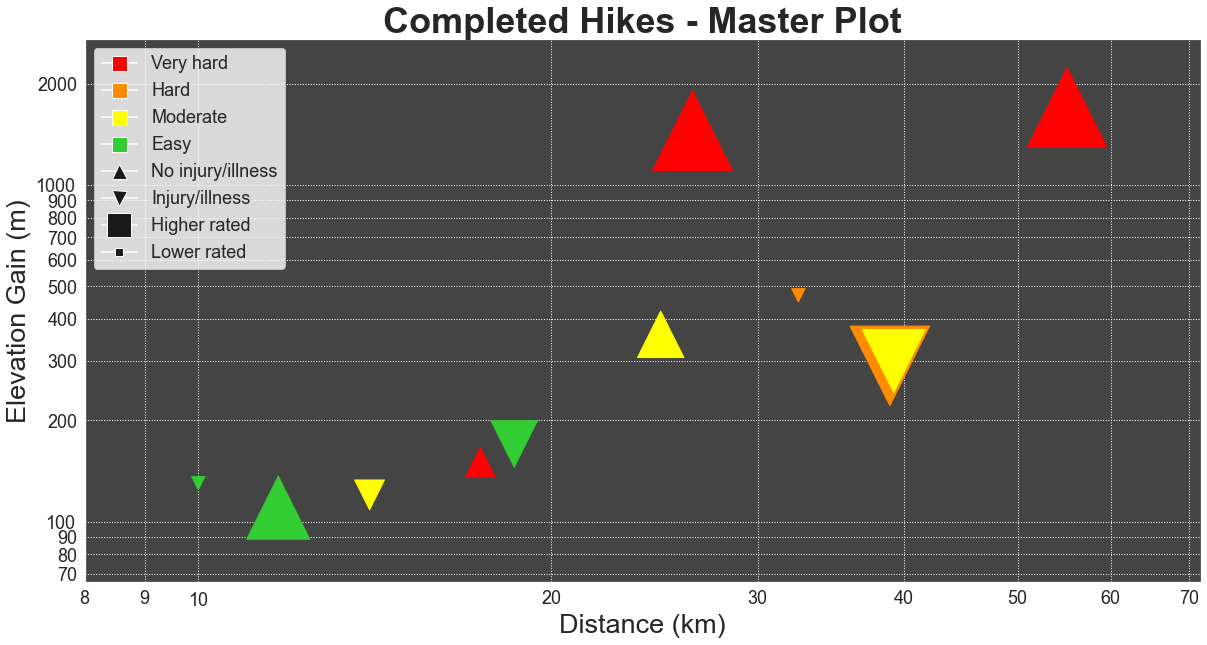

<Figure size 1440x288 with 0 Axes>

In [35]:
### Master Plot

injDist = []
injGain = []
injRating = []
injDifficulty = []
uninjDist = []
uninjGain = []
uninjRating = []
uninjDifficulty = []

# Don't ask, or even better, don't look
def ratingSizingFunction(rating):
    return (rating - 0.2)**2*completedHikes.len.max()*5
    

for i, hike in completedHikes.iterrows():
    if hike.injury == 1:
        injDist.append(hike.len)
        injGain.append(hike.gain)
        injRating.append(ratingSizingFunction(hike.rating))
        if hike.difficulty == 1:
            injDifficulty.append(0)
        elif hike.difficulty == 3:
            injDifficulty.append(1)
        elif hike.difficulty == 5:
            injDifficulty.append(2)
        elif hike.difficulty == 7:
            injDifficulty.append(3)
    else:
        uninjDist.append(hike.len)
        uninjGain.append(hike.gain)
        uninjRating.append(ratingSizingFunction(hike.rating))
        if hike.difficulty == 1:
            uninjDifficulty.append(0)
        elif hike.difficulty == 3:
            uninjDifficulty.append(1)
        elif hike.difficulty == 5:
            uninjDifficulty.append(2)
        elif hike.difficulty == 7:
            uninjDifficulty.append(3)

# Plotting
plt.scatter(injDist, injGain, s = injRating, c = gyorColors[injDifficulty], marker = 'v')
plt.scatter(uninjDist, uninjGain, s= uninjRating, c = gyorColors[uninjDifficulty], marker = '^')
  
fig = plt.gcf()
fig.set_size_inches(standardCanvasWidth, standardCanvasHeight)
plt.rcParams['axes.facecolor'] = backgroundColor
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(completedHikes.len.min()*0.8, completedHikes.len.max()*1.3)
ax.set_ylim(completedHikes.gain.min()*0.6, completedHikes.gain.max()*1.6)
plt.xlabel("Distance (km)", size=axisLabelSize)
plt.ylabel("Elevation Gain (m)", size=axisLabelSize)
plt.grid(axis="both", which="both", linestyle= 'dotted')
ax.tick_params(axis='both', which='both', labelsize=tickLabelSize)
ax.xaxis.set_minor_formatter(mticker.FormatStrFormatter('%.0f'))
ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f'))
ax.yaxis.set_minor_formatter(mticker.FormatStrFormatter('%.0f'))
ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f'))
ax.set_title("Completed Hikes - Master Plot", size=titleSize, fontweight='bold')

legend_elements = [
    Line2D([0], [0], marker='s', color=legendColor, label="Very hard", markerfacecolor=gyorColors[3], markersize=15),
    Line2D([0], [0], marker='s', color=legendColor, label="Hard", markerfacecolor=gyorColors[2], markersize=15),
    Line2D([0], [0], marker='s', color=legendColor, label="Moderate", markerfacecolor=gyorColors[1], markersize=15),
    Line2D([0], [0], marker='s', color=legendColor, label="Easy", markerfacecolor=gyorColors[0], markersize=15),
    Line2D([0], [0], marker='^', color=legendColor, label="No injury/illness", markerfacecolor='k', markersize=15),
    Line2D([0], [0], marker='v', color=legendColor, label="Injury/illness", markerfacecolor='k', markersize=15),
    Line2D([0], [0], marker='s', color=legendColor, label="Higher rated", markerfacecolor='k', markersize=24),
    Line2D([0], [0], marker='s', color=legendColor, label="Lower rated", markerfacecolor='k', markersize=8)]
ax.legend(handles=legend_elements, facecolor=legendColor, prop={'size': legendTextSize})

plt.show()
plt.clf()
            

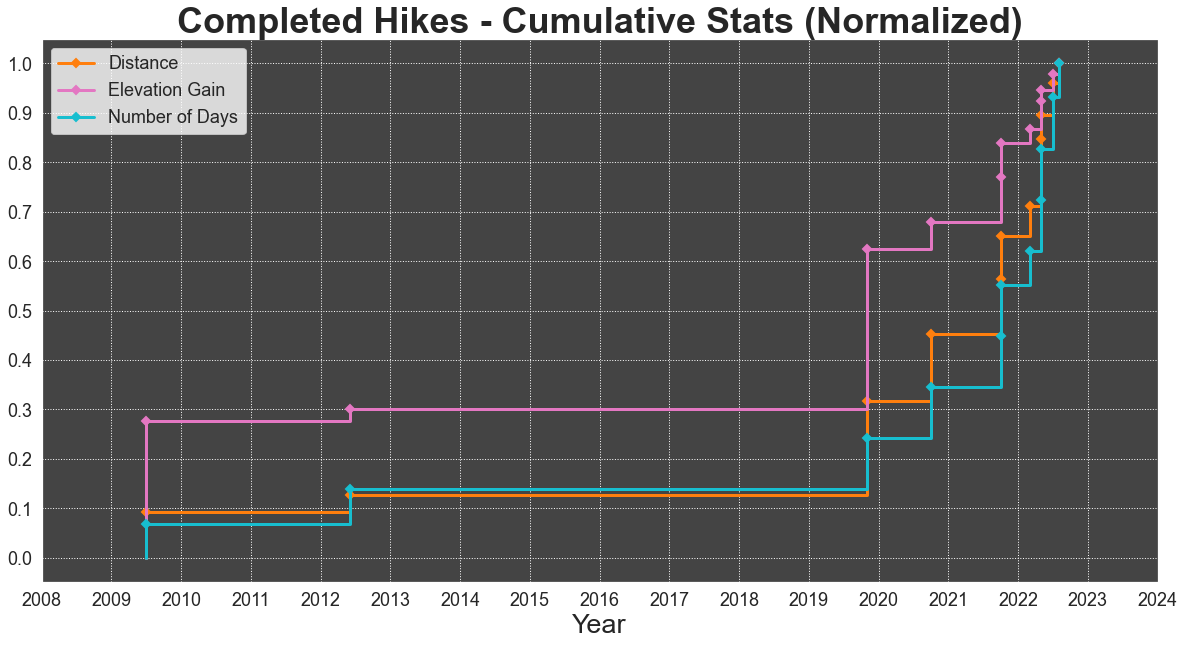

<Figure size 1440x288 with 0 Axes>

In [32]:
### Cumulative Stats

def monthToYears(month):
    return months.index(month)/12
    
cumulativeDist = []
cumulativeGain = []
cumulativeDays = []
year = []

# Cumulate
for i, hike in completedHikes.iterrows():
    if i == 0:
        # Adding a dummy point for step plot appearance
        cumulativeDist.append(0)
        cumulativeGain.append(0)
        cumulativeDays.append(0)
        year.append(hike.year + monthToYears(hike.month))
        
        cumulativeDist.append(hike.len)
        cumulativeGain.append(hike.gain)
        cumulativeDays.append(hike.days)
        year.append(hike.year + monthToYears(hike.month))
        
    else:
        cumulativeDist.append(cumulativeDist[i] + hike.len)
        cumulativeGain.append(cumulativeGain[i] + hike.gain)
        cumulativeDays.append(cumulativeDays[i] + hike.days)
        year.append(hike.year + monthToYears(hike.month))

# Plotting
ax = plt.gca()
ax.set_title("Completed Hikes - Cumulative Stats (Normalized)", size=titleSize, fontweight="bold")
plt.step(year, cumulativeDist/np.max(cumulativeDist), label="Distance", where="post", linewidth=3,
         marker="D", mew=2, color=distColor, markevery=list(range(1,completedHikes.shape[0]+1)))
plt.step(year, cumulativeGain/np.max(cumulativeGain), label="Elevation Gain", where="post", linewidth=3,
         marker="D", mew=2, color=gainColor, markevery=list(range(1,completedHikes.shape[0]+1)))
plt.step(year, cumulativeDays/np.max(cumulativeDays), label="Number of Days", where="post", linewidth=3,
         marker="D", mew=2, color=daysColor, markevery=list(range(1,completedHikes.shape[0]+1)))
fig = plt.gcf()
fig.set_size_inches(standardCanvasWidth, standardCanvasHeight)
plt.rcParams['axes.facecolor'] = backgroundColor
plt.grid(axis="both", which="both", linestyle= 'dotted')
ax.tick_params(axis='both', which='both', labelsize=tickLabelSize)
plt.legend(facecolor=legendColor, prop={'size': legendTextSize})
plt.locator_params(axis='y', nbins=11)
plt.xlabel("Year", size=axisLabelSize)
plt.xticks(ticks=range(int(completedHikes.year.min()) - 1, int(completedHikes.year.max()) + 3))
plt.show()
plt.clf()


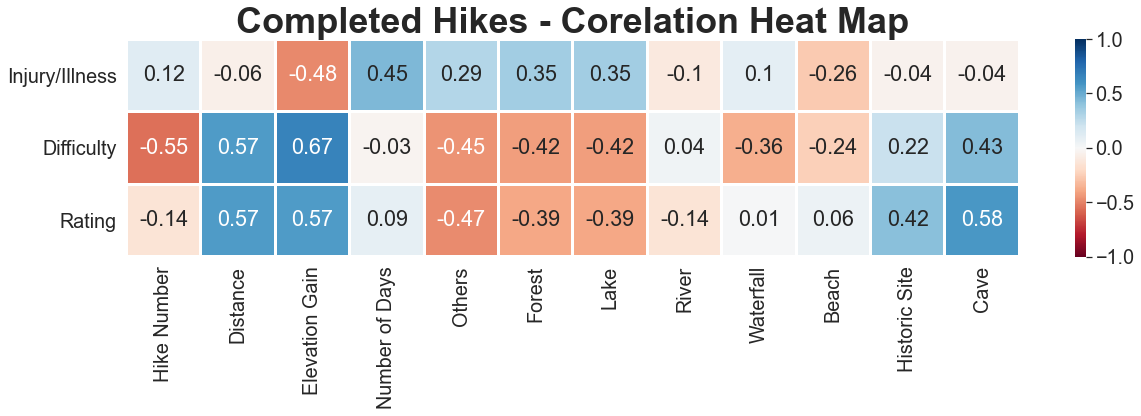

<function matplotlib.pyplot.clf()>

In [33]:
### Corelation Heat Map

corr = completedHikes.corr().round(2)
corr = corr.iloc[15:,:-3] # converting from square to rectangle
corr = corr.drop(['lat','lng','year'],axis=1) # removing columns I don't find interesting here
x_labels=['Hike Number','Distance','Elevation Gain','Number of Days','Others',
          'Forest','Lake','River','Waterfall','Beach','Historic Site','Cave']
y_labels=["Injury/Illness", "Difficulty", "Rating"]
sns.set(rc={"figure.figsize":(standardCanvasWidth, 4)})
sns.set(font_scale=1.8)
heatmap = sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0, cmap="RdBu",
                      linewidths=2, xticklabels=x_labels, yticklabels=y_labels)
ax = plt.gca()
ax.set_title("Completed Hikes - Corelation Heat Map", size=titleSize, fontweight="bold")
plt.show()
plt.clf